In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, Dense, Flatten, BatchNormalization, MaxPooling2D, Activation
from keras.optimizers import Adam

from sklearn.model_selection import train_test_split

In [3]:
test = pd.read_csv("./input/Kannada-MNIST/test.csv")
train = pd.read_csv("./input/Kannada-MNIST/train.csv")

x = train.iloc[:,1:].values
y = train.iloc[:,0].values

x = x.reshape(x.shape[0], 28, 28, 1)
y = to_categorical(y, 10)

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.10, random_state=42) 

train_datagen = ImageDataGenerator(rescale=1./255.,
                                   rotation_range=10,
                                   width_shift_range=0.25,
                                   height_shift_range=0.25,
                                   shear_range=0.1,
                                   zoom_range=0.25,
                                   horizontal_flip=False)

valid_datagen = ImageDataGenerator(rescale=1./255.)

In [3]:
def model_kmnist():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(32, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3, 3), padding='same'))
    model.add(BatchNormalization())

    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(Conv2D(128, (3, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dropout(0.5))

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    return model

In [4]:
batch_size = 512
num_classes = 10
epochs = 50
learning_rate = 5e-3

model = model_kmnist()
model.summary(120)


model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=learning_rate),
              metrics=['acc'])


Model: "sequential_1"
________________________________________________________________________________________________________________________
Layer (type)                                          Output Shape                                    Param #           
conv2d_1 (Conv2D)                                     (None, 28, 28, 32)                              320               
________________________________________________________________________________________________________________________
batch_normalization_1 (BatchNormalization)            (None, 28, 28, 32)                              128               
________________________________________________________________________________________________________________________
activation_1 (Activation)                             (None, 28, 28, 32)                              0                 
________________________________________________________________________________________________________________________
conv2d_2 

In [5]:
history = model.fit_generator(train_datagen.flow(x_train, y_train, batch_size=batch_size),
                              epochs=epochs,
                              validation_data=valid_datagen.flow(x_valid, y_valid))


Epoch 1/50
106/106 [==============================] - 10s 96ms/step - loss: 1.4750 - acc: 0.4565 - val_loss: 10.0280 - val_acc: 0.0955
Epoch 2/50
106/106 [==============================] - 8s 78ms/step - loss: 0.2837 - acc: 0.9128 - val_loss: 46.8017 - val_acc: 0.0955
Epoch 3/50
106/106 [==============================] - 8s 79ms/step - loss: 0.1394 - acc: 0.9598 - val_loss: 24.8714 - val_acc: 0.0955
Epoch 4/50
106/106 [==============================] - 8s 80ms/step - loss: 0.1091 - acc: 0.9681 - val_loss: 9.9539 - val_acc: 0.2222
Epoch 5/50
106/106 [==============================] - 8s 79ms/step - loss: 0.0923 - acc: 0.9736 - val_loss: 0.0017 - val_acc: 0.9883
Epoch 6/50
106/106 [==============================] - 10s 95ms/step - loss: 0.0805 - acc: 0.9768 - val_loss: 0.0590 - val_acc: 0.9785
Epoch 7/50
106/106 [==============================] - 15s 139ms/step - loss: 0.0727 - acc: 0.9791 - val_loss: 0.5439 - val_acc: 0.9870
Epoch 8/50
106/106 [==============================] - 16s 153

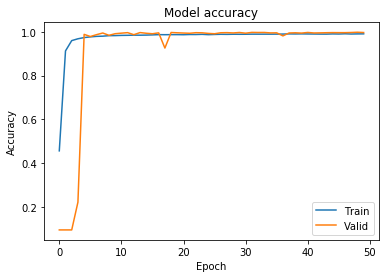

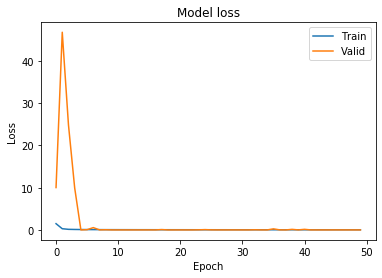

In [8]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'])
plt.savefig('acc_cnn_pp.pdf')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Valid'])
plt.savefig('loss_cnn_pp.pdf')
plt.show()